In [1]:
# Importando Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd #para geolocalización
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from pandas_profiling import ProfileReport # infoHTML
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# muestra gráficos
%matplotlib inline

In [3]:
# Leemos los datos seleccionados
df_main_inicial = pd.read_csv('../data/merged_data_cleaned.csv',index_col=0)

In [4]:
df_main = df_main_inicial.copy()

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1339 non-null   object 
 1   Owner                  1332 non-null   object 
 2   Country.of.Origin      1338 non-null   object 
 3   Farm.Name              980 non-null    object 
 4   Lot.Number             276 non-null    object 
 5   Mill                   1021 non-null   object 
 6   ICO.Number             1182 non-null   object 
 7   Company                1130 non-null   object 
 8   Altitude               1113 non-null   object 
 9   Region                 1280 non-null   object 
 10  Producer               1107 non-null   object 
 11  Number.of.Bags         1339 non-null   int64  
 12  Bag.Weight             1339 non-null   object 
 13  In.Country.Partner     1339 non-null   object 
 14  Harvest.Year           1292 non-null   object 
 15  Grad

In [6]:
df_main.head(10)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromia,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromiya,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
9,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,"snnp/kaffa zone,gimbowereda",...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5


In [7]:
df_main.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Generación de reporte HTML

In [8]:
profile = ProfileReport(df_main, title='Pandas Profiling Report', explorative=True)

In [9]:
# profile.to_file('../data/reports/merged_data_cleaned.html')

Renombrar columnas a usar

In [10]:
df_main.rename(columns={'Country.of.Origin': 'Country_of_Origin',
       'ICO.Number':'ICO_number', 'Number.of.Bags': 'Number_of_Bags', 'Bag.Weight': 'Bag_Weight', 
       'Harvest.Year':'Harvest_Year', 'Grading.Date': 'Grading_Date', 'Owner.1':'Owner_1', 
       'Processing.Method': 'Processing_Method', 'Clean.Cup':'Clean_Cup','Cupper.Points':'Cupper_Points', 
       'Total.Cup.Points': 'Total_Cup_Points', 'Category.One.Defects':'Category_One_Defects',
       'Category.Two.Defects':'Category_Two_Defects', 'Certification.Body': 'Certification_Body',
       'Certification.Address':'Certification_Address', 'Certification.Contact': 'Certification_Contact'},inplace=True)

df_main.columns

Index(['Species', 'Owner', 'Country_of_Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO_number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number_of_Bags', 'Bag_Weight', 'In.Country.Partner', 'Harvest_Year',
       'Grading_Date', 'Owner_1', 'Variety', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean_Cup', 'Sweetness', 'Cupper_Points', 'Total_Cup_Points',
       'Moisture', 'Category_One_Defects', 'Quakers', 'Color',
       'Category_Two_Defects', 'Expiration', 'Certification_Body',
       'Certification_Address', 'Certification_Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Seleccion de variables a usar

In [11]:
columns_use = ['Species', 'Variety', 'Country_of_Origin',
       'Mill', 'ICO_number', 'Company', 'Region', 'Producer',
       'Number_of_Bags', 'Bag_Weight', 'Harvest_Year',
       'Grading_Date', 'Owner_1', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean_Cup', 'Sweetness', 'Cupper_Points', 'Total_Cup_Points',
       'Moisture', 'Quakers', 'Color', 'Category_One_Defects',
       'Category_Two_Defects', 'Expiration', 'Certification_Body', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters', 'Altitude']

In [12]:
# Renombrar el dataframe con las variables a usar
df_main = df_main[columns_use]

## Preguntas de Exploración

Variedades del Café
1. Cuales son las 8 Variedades de Café que más se siembran el mundo?
    - Cual es la distribución geográfica de las 8 variedades más sembradas?
2. Cuanto es la humedad promedio por Variedad?

Calidad del Café
1. La altitud del café impacta con el sabor?
2. La altitud del café impacta con la calidad del café?
3. Cuales son las 5 mejores variedades de café, de acuerdo a la puntuación del catador?

Calidad del Café Peruano
1. En que puesto se encuentra el café peruano con respecto a las demás variedades?
2. El café peruano se encuentra dentro de los mejores cafés de acuerdo a los rangos de la de la Specialty Coffee Association  (SCAA)?

### Limpieza de la data

Eliminando algunas variables

In [13]:
df_main[df_main['Country_of_Origin'].isna()].transpose()

,1197
Species,Arabica
Variety,NaN
Country_of_Origin,NaN
Mill,NaN
ICO_number,3-37-1980
Company,NaN
Region,NaN
Producer,NaN
Number_of_Bags,149
Bag_Weight,70 kg


In [14]:
# la fila ha sido eliminada porque tiene muchos valores vacíos y Total_Cup_Points está por debajo de 80 puntos
df_main = df_main.drop(index=1197)

ahora me queda 1338 filas

In [15]:
# Seleccionar los países que no se repitan y convertirlos a str
# luego convertirlo en una lista
df_paises = df_main.Country_of_Origin.unique().astype(str).tolist()
#Ordenar la lista de paises
for i in sorted(df_paises):
    print(i)

Brazil
Burundi
China
Colombia
Costa Rica
Cote d?Ivoire
Ecuador
El Salvador
Ethiopia
Guatemala
Haiti
Honduras
India
Indonesia
Japan
Kenya
Laos
Malawi
Mauritius
Mexico
Myanmar
Nicaragua
Panama
Papua New Guinea
Peru
Philippines
Rwanda
Taiwan
Tanzania, United Republic Of
Thailand
Uganda
United States
United States (Hawaii)
United States (Puerto Rico)
Vietnam
Zambia


In [16]:
# función para gráficos para variable numérica

def diagnostic_numerico_plot(df, variable):
    # Define el tamaño de la grafica
    
    # Histograma
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histograma')
    
    # Grafica de Caja
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Grafico de Cajas')

    df[variable].info()


In [17]:
# función para gráfico para variables categóricas

def diagnostic_categorico_plot(df,variable,titulo_graf):
    df[variable].value_counts().plot(kind='barh',title=titulo_graf)


In [18]:
# Columnas relevantes para eliminar o remplazar outliers
columnas_analisis_outliers_nan = ['Species','Variety','Country_of_Origin',
                                    'altitude_mean_meters','Total_Cup_Points']

In [19]:
# Filtrar la puntuación del café(Total_Cup_Points) mayores a 80 que el catador construye.
Total_Cup_Points_mayor80 = df_main[df_main.Total_Cup_Points >= 80 ][columnas_analisis_outliers_nan]
Total_Cup_Points_mayor80 

,Species,Variety,Country_of_Origin,altitude_mean_meters,Total_Cup_Points
0,Arabica,NaN,Ethiopia,2075.0,90.58
1,Arabica,Other,Ethiopia,2075.0,89.92
2,Arabica,Bourbon,Guatemala,1700.0,89.75
3,Arabica,NaN,Ethiopia,2000.0,89.00
4,Arabica,Other,Ethiopia,2075.0,88.83
...,...,...,...,...,...
1328,Robusta,NaN,Uganda,1600.0,80.92
1329,Robusta,NaN,Uganda,1745.0,80.58
1330,Robusta,NaN,Uganda,1200.0,80.50
1331,Robusta,NaN,India,750.0,80.17


Analisis para la columna "Variety" que contiene filas con NaN 

In [20]:
# Filtrar del Dataframe anterior(Puntuación del cafe >=80) los valores NaN de la columna "Variety"
Total_Cup_Points_mayor80[Total_Cup_Points_mayor80['Variety'].isna()]

,Species,Variety,Country_of_Origin,altitude_mean_meters,Total_Cup_Points
0,Arabica,NaN,Ethiopia,2075.0,90.58
3,Arabica,NaN,Ethiopia,2000.0,89.00
5,Arabica,NaN,Brazil,NaN,88.83
7,Arabica,NaN,Ethiopia,1635.0,88.67
8,Arabica,NaN,Ethiopia,1635.0,88.42
...,...,...,...,...,...
1328,Robusta,NaN,Uganda,1600.0,80.92
1329,Robusta,NaN,Uganda,1745.0,80.58
1330,Robusta,NaN,Uganda,1200.0,80.50
1331,Robusta,NaN,India,750.0,80.17


Debido a que la cantidad de variedades con NaN es alta y se encuentran dentro de los mejores Puntuaciones le pondremos el valor de la categoría "other_2"

In [21]:
df_main['Variety'] = df_main['Variety'].replace(np.nan,"Other_2")

Cambiando de una avriables categórica a Numérica

In [22]:
# Columnas relevantes para eliminar o remplazar outliers de altitud
columnas_altitud= ['Species','Variety','Country_of_Origin', 'Company', 'Altitude',
                    'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']


Encontrando algunos Outliers

In [23]:
df_main[columnas_altitud].sort_values(by='altitude_low_meters',ascending=False).head(15)

,Species,Variety,Country_of_Origin,Company,Altitude,altitude_low_meters,altitude_high_meters,altitude_mean_meters
896,Arabica,Bourbon,Guatemala,"unex guatemala, s.a.",190164,190164.0,190164.0,190164.0
1144,Arabica,Bourbon,Guatemala,"unex guatemala, s.a.",1901.64,190164.0,190164.0,190164.0
1040,Arabica,Other,Nicaragua,"comercial internacional exportadora, s.a.",1100.00 mosl,110000.0,110000.0,110000.0
543,Arabica,Moka Peaberry,Brazil,expocaccer,11000 metros,11000.0,11000.0,11000.0
1098,Arabica,Catuai,Myanmar,NaN,4287,4287.0,4287.0,4287.0
840,Arabica,Catuai,Myanmar,NaN,4001,4001.0,4001.0,4001.0
1123,Arabica,Other,Myanmar,ngu shwe li coffee estate,3845,3845.0,3845.0,3845.0
1038,Arabica,Catuai,Myanmar,NaN,3825,3825.0,3825.0,3825.0
1073,Arabica,Other,Myanmar,shwe yin mar coffee,3800,3800.0,3800.0,3800.0
1269,Arabica,Other,Indonesia,NaN,3500,3500.0,3500.0,3500.0


Modificando algunos Outliers en altitud baja, media, alta

In [24]:
df_main.replace({'altitude_low_meters':  190164.0, 
                'altitude_high_meters':  190164.0, 
                'altitude_mean_meters':  190164.0}, 1901.64,inplace=True)

df_main.replace({'altitude_low_meters':  110000.0, 
                'altitude_high_meters':  110000.0, 
                'altitude_mean_meters':  110000.0}, 1100.0,inplace=True)

df_main.replace({'altitude_low_meters':  11000.0, 
                'altitude_high_meters':  11000.0, 
                'altitude_mean_meters':  11000.0}, 1100.0,inplace=True)

In [25]:
df_main[columnas_altitud][df_main.Species=='Arabica'].min()

Species                 Arabica
Variety                  Arusha
Country_of_Origin        Brazil
altitude_low_meters         1.0
altitude_high_meters        1.0
altitude_mean_meters        1.0
dtype: object

In [26]:
df_main[columnas_altitud][df_main.Species=='Arabica'].max()

Species                        Arabica
Variety                 Yellow Bourbon
Country_of_Origin               Zambia
altitude_low_meters             4287.0
altitude_high_meters            5900.0
altitude_mean_meters            4287.0
dtype: object

Mediana de la Especie "Arábica", para reemplzarlo por los valores por debajo del mínimo

In [27]:
mediana_robusta = df_main[columnas_altitud][df_main.Species=='Arabica'].median()
mediana_robusta

altitude_low_meters     1310.64
altitude_high_meters    1350.00
altitude_mean_meters    1310.64
dtype: float64

Mediana de la Especie "Robusta", para reemplzarlo por los valores por debajo del mínimo

In [28]:
mediana_arabica = df_main[columnas_altitud][df_main.Species=='Robusta'].median()
mediana_arabica

altitude_low_meters     1095.0
altitude_high_meters    1200.0
altitude_mean_meters    1100.0
dtype: float64

Todos los valores nulos

In [29]:
df_main[columnas_altitud].isnull().sum()

Species                   0
Variety                   0
Country_of_Origin         0
Company                 208
Altitude                225
altitude_low_meters     229
altitude_high_meters    229
altitude_mean_meters    229
dtype: int64

Reemplazar los valores nulos(missing) por 0.0

In [30]:
df_main[['altitude_low_meters','altitude_high_meters','altitude_mean_meters']] = df_main[['altitude_low_meters','altitude_high_meters','altitude_mean_meters']].fillna(0.0)


Mostramdo todos las altitudes menores a 200 de las tres columnas

In [31]:
df_main[columnas_altitud][(df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200)].sort_values(by='altitude_low_meters',ascending=True)

,Species,Variety,Country_of_Origin,Company,Altitude,altitude_low_meters,altitude_high_meters,altitude_mean_meters
5,Arabica,Other_2,Brazil,NaN,NaN,0.0,0.0,0.0
822,Arabica,Other_2,Nicaragua,volcafe specialty coffee,NaN,0.0,0.0,0.0
824,Arabica,Other_2,Honduras,thrive farmers,NaN,0.0,0.0,0.0
851,Arabica,Hawaiian Kona,United States (Hawaii),kona pacific farmers cooperative,NaN,0.0,0.0,0.0
858,Arabica,Other_2,United States (Hawaii),NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
595,Arabica,Typica,Colombia,coffee export,1.65,165.0,165.0,165.0
442,Arabica,Bourbon,"Tanzania, United Republic Of",volcafe/taylorwinch tanzania ltd,16.8,168.0,168.0,168.0
127,Arabica,Mundo Novo,Japan,matsuzawa coffee,170,170.0,170.0,170.0
435,Arabica,Caturra,Colombia,exportadora de cafe condor s.a,175,175.0,175.0,175.0


Los valores de las altitudes se muestran por debajo del valor mínimo, por lo tanto reeemplazaremos por la mediana

In [32]:
df_main['altitude_low_meters'][(df_main.Species=='Arabica') & ((df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200))] = mediana_arabica['altitude_low_meters']
df_main['altitude_high_meters'][(df_main.Species=='Arabica') & ((df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200))] = mediana_arabica['altitude_high_meters']
df_main['altitude_mean_meters'][(df_main.Species=='Arabica') & ((df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200))] = mediana_arabica['altitude_mean_meters']

df_main['altitude_low_meters'][(df_main.Species=='Robusta') & ((df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200))] = mediana_robusta['altitude_low_meters']
df_main['altitude_high_meters'][(df_main.Species=='Robusta') & ((df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200))] = mediana_robusta['altitude_high_meters']
df_main['altitude_mean_meters'][(df_main.Species=='Robusta') & ((df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200))] = mediana_robusta['altitude_mean_meters']

C:\Users\ele_9\AppData\Local\Temp\ipykernel_13936\1299469916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['altitude_low_meters'][(df_main.Species=='Arabica') & ((df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200))] = mediana_arabica['altitude_low_meters']
C:\Users\ele_9\AppData\Local\Temp\ipykernel_13936\1299469916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['altitude_high_meters'][(df_main.Species=='Arabica') & ((df_main.altitude_mean_meters < 200) | (df_main.altitude_high_meters < 200))] = mediana_arabica['altitude_high_meters']
C:\Users\ele_9\AppData\Local\Temp\

Limpieza para la calidad del café

In [33]:
df_main[(df_main.Aroma < 2)|(df_main.Flavor < 2)|(df_main.Aftertaste < 2)].transpose()

,1310
Species,Arabica
Variety,Caturra
Country_of_Origin,Honduras
Mill,cigrah s.a de c.v.
ICO_number,13-111-053
Company,cigrah s.a de c.v
Region,comayagua
Producer,Reinerio Zepeda
Number_of_Bags,275
Bag_Weight,69 kg


Se elimina la fila "1310" debido a que no contiene información de ningún dato que nos proporciona la calidad del café

In [34]:
df_main = df_main.drop(index=1310)

guardar los datos limpiados para usarlos en el reporte streamlit

In [35]:
df_main_cleaning = df_main.to_csv('../data/df_main_cleaning.csv')

### Respondiendo preguntas de Exploración

#### Especies del Café

##### 1. Cuales son las 8 Especies de Café que más se siembran el mundo(Nuestra data tiene de Especie Arábica y Robusta)?

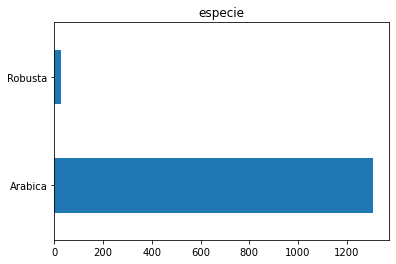

In [36]:
# Gráfico de las Especies
plt.figure(figsize = (6,4))
diagnostic_categorico_plot(df_main,'Species','especie')

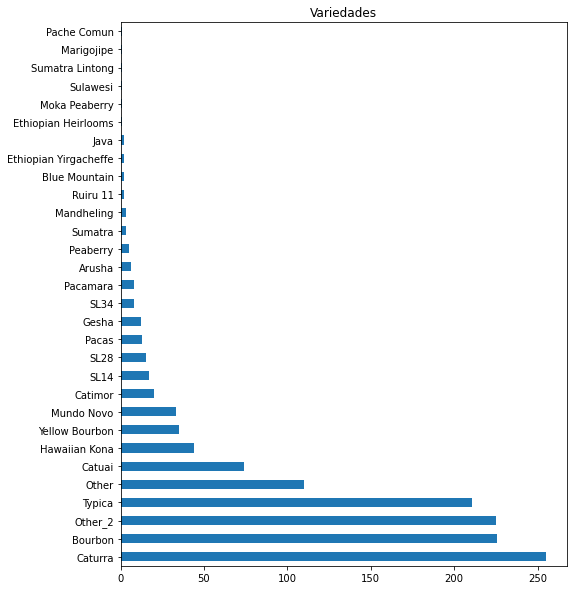

In [37]:
# Gráfico de las Variedades
plt.figure(figsize = (8,10))
diagnostic_categorico_plot(df_main,'Variety','Variedades')

In [38]:
# Cuenta la cantidad de filas repetidas en la columna 'Variety'
conteo_variedad_x_especie = (df_main[['Variety']] # Seleccion de columna y elimino NaNs
                            .groupby(['Variety']).size() # Agrupo y cuento las obs. por intervalo de
                            .reset_index() # Convierte a df 
                            .rename({0: 'conteo'}, axis=1) # Cambia el nombre de "0" a "conteo"
                            .sort_values(by=['conteo'],ascending=False)) # Ordena los Datos de mayor a menor
conteo_variedad_x_especie.head(8)

,Variety,conteo
5,Caturra,255
2,Bourbon,226
16,Other_2,225
28,Typica,211
15,Other,110
4,Catuai,74
9,Hawaiian Kona,44
29,Yellow Bourbon,35


In [39]:
# Eliminar las filas Other, Other_2 para quedarme con las variedades que si se encuentra específicado
conteo_variedad_x_especie = conteo_variedad_x_especie[(conteo_variedad_x_especie['Variety']!='Other') & (conteo_variedad_x_especie['Variety']!='Other_2') ]
conteo_variedad_x_especie = conteo_variedad_x_especie.head(8)
conteo_variedad_x_especie

,Variety,conteo
5,Caturra,255
2,Bourbon,226
28,Typica,211
4,Catuai,74
9,Hawaiian Kona,44
29,Yellow Bourbon,35
14,Mundo Novo,33
3,Catimor,20


Text(0.5, 0.98, 'Las 8 Variedades más sembradas en el mundo')

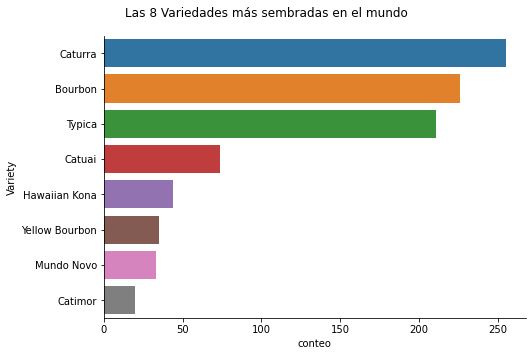

In [40]:
# Las 8 Variedades más sembradas en el mundo
graf_variedad_especie = sns.catplot(
    data=conteo_variedad_x_especie, kind="bar",
    x="conteo", y="Variety", aspect=1.5
)

graf_variedad_especie.fig.subplots_adjust(top=0.9)
graf_variedad_especie.fig.suptitle('Las 8 Variedades más sembradas en el mundo')


Podemos Observar que las variedades que más se siembran el mundo son 
1. Caturra
2. Bourbon
3. Typica
4. Catuai
5. Hawaiian Kona
6. Yellow Bourbon
7. Mundo Novo
8. Catimor

1.1 Cual es la distribución geográfica de las 8 variedades más sembradas?

Realiza un filtro de las 8 variedades que se plantan en el mundo por cada país, de las encontradas anteriormente.

In [41]:
# Pasar del DataFrame "conteo_variedad_x_especie" a lista
filtro_variety_best = conteo_variedad_x_especie['Variety'].tolist()
# Filtra los datos de las 8 mejores variedades
filtro_variedad =  df_main[df_main.Variety.isin(filtro_variety_best)]
filtro_variedad.head(3)

,Species,Variety,Country_of_Origin,Mill,ICO_number,Company,Region,Producer,Number_of_Bags,Bag_Weight,...,Color,Category_One_Defects,Category_Two_Defects,Expiration,Certification_Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Altitude
2,Arabica,Bourbon,Guatemala,NaN,NaN,NaN,NaN,NaN,5,1,...,NaN,0,0,"May 31st, 2011",Specialty Coffee Association,m,1600.0,1800.0,1700.0,1600 - 1800 m
18,Arabica,Catimor,China,echo coffee mill,NaN,yunnan coffee exchange,yunnan,Echo Coffee,3,60 kg,...,Green,0,0,"April 7th, 2017",Yunnan Coffee Exchange,m,1450.0,1450.0,1450.0,1450
21,Arabica,Caturra,Costa Rica,cafe altura de san ramon,5-562-0015,the coffee source inc.,san ramon,SEVERAL,250,3 lbs,...,Green,0,2,"April 2nd, 2015",Specialty Coffee Association,m,1300.0,1300.0,1300.0,1300 msnm


Agrupar por País las 8 variedades más sembradas

In [42]:
# Cuenta la cantidad de filas repetidas en la columna 'Variety'
conteo_contry = (filtro_variedad[['Country_of_Origin']] # Seleccion de columna y elimino NaNs
                                    .groupby(['Country_of_Origin']).size() # Agrupo y cuento las obs. por intervalo de
                                    .reset_index() # Convierte a df 
                                    .rename({0: 'conteo'}, axis=1) # Cambia el nombre de "0" a "conteo"
                                    .sort_values(by=['conteo'],ascending=False)) # Ordena de mayor a menor
conteo_contry.head(10)

,Country_of_Origin,conteo
14,Mexico,207
7,Guatemala,157
3,Colombia,132
0,Brazil,112
21,Taiwan,66
4,Costa Rica,44
25,United States (Hawaii),44
9,Honduras,44
2,China,14
5,El Salvador,13


Importando el dataset de ubicaciones del mundo

In [43]:
# países del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ciudades
# cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


Renombrar el nombre de la columna para más adelante poder usarla

In [44]:
world.rename(columns={'name': 'Country_of_Origin'},inplace=True)

Combinar geodataframe "world" con "filtro_country" para poder crear un gráfico completo de todos los paíces

In [45]:
filtro_country_3 = pd.merge(world, conteo_contry,on= 'Country_of_Origin',how='left')
filtro_country_3.sort_values(by='conteo', ascending=False).head()

,pop_est,continent,Country_of_Origin,iso_a3,gdp_md_est,geometry,conteo
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",207.0
38,15460732,North America,Guatemala,GTM,131800.0,"POLYGON ((-92.22775 14.53883, -92.20323 14.830...",157.0
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",132.0
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",112.0
140,23508428,Asia,Taiwan,TWN,1127000.0,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",66.0


<AxesSubplot:>

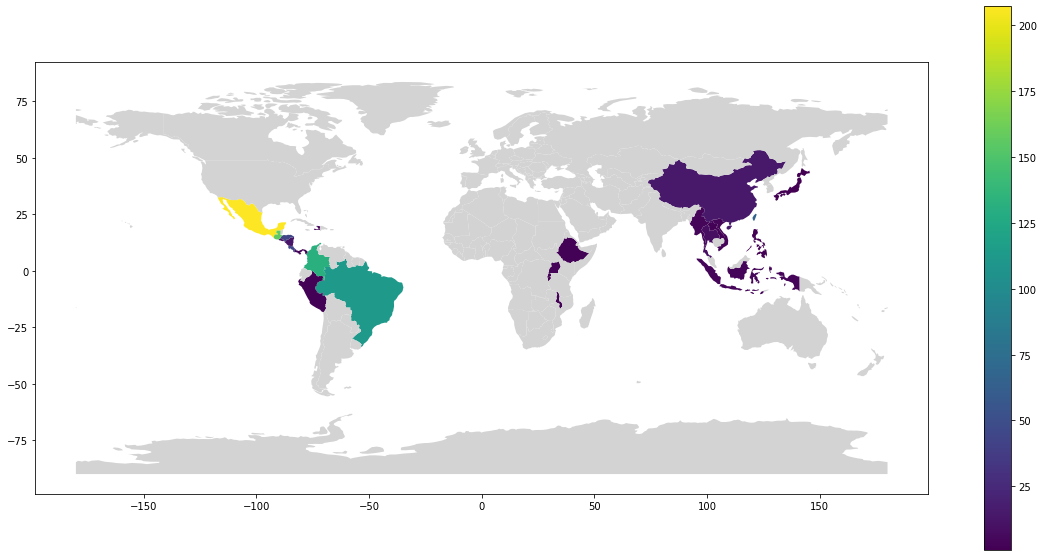

In [46]:
# Mapa de calor de las 8 variedades más sembradas x país
filtro_country_3.plot("conteo", cmap='viridis', figsize=(20, 10),
                       legend=True,
                       missing_kwds={
                        "color": "lightgrey",
                        "label": "Missing values",
                        },)

##### 2. Cuanto es la humedad promedio por Variedad?

In [47]:
altitud_promedio_variedad = (df_main.groupby('Variety')['altitude_mean_meters'].mean()
                            .sort_values(ascending=False)
                            .reset_index() # Convierte a df 
                            .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo")
altitud_promedio_variedad.head()

,Variety,altitude_mean_meters
0,Ethiopian Heirlooms,2000.000000
1,Ethiopian Yirgacheffe,1875.000000
2,Ruiru 11,1842.500000
3,Pache Comun,1706.880000
4,SL14,1688.235294


In [48]:
altitud_promedio_variedad_8_mas = altitud_promedio_variedad[altitud_promedio_variedad.Variety.isin(conteo_variedad_x_especie['Variety'].tolist())]
altitud_promedio_variedad_8_mas

,Variety,altitude_mean_meters
13,Caturra,1439.693453
14,Catuai,1411.392432
15,Catimor,1410.500000
18,Bourbon,1324.730280
24,Typica,1136.905972
26,Hawaiian Kona,1100.000000
28,Yellow Bourbon,1099.714286
29,Mundo Novo,1060.212121


Text(0.5, 0.98, 'Altitud promedio de las 8 Variedades más sembradas en el mundo')

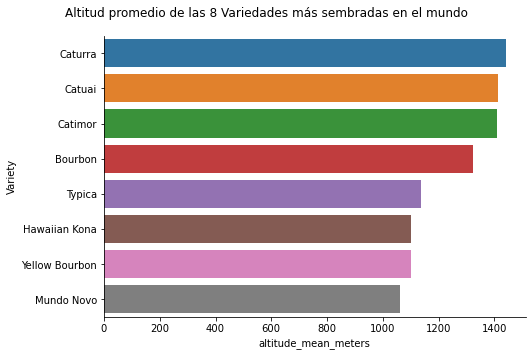

In [49]:
# Altitud promedio de las 8 Variedades más sembradas en el mundo
graf_altitud_promedio_variedad_8_mas = sns.catplot(
    data=altitud_promedio_variedad_8_mas, kind="bar",
    x="altitude_mean_meters", y="Variety", aspect=1.5,
)

graf_altitud_promedio_variedad_8_mas.fig.subplots_adjust(top=0.9)
graf_altitud_promedio_variedad_8_mas.fig.suptitle('Altitud promedio de las 8 Variedades más sembradas en el mundo')

#### Calidad del Café

##### 1. La altitud del café impacta con el sabor?

In [50]:
altitud_x_sabor = (df_main.groupby('Variety')[['altitude_mean_meters','Flavor']].mean()
                    .sort_values(by='altitude_mean_meters',ascending=False)
                    .reset_index() # Convierte a df 
                    .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo")
altitud_x_sabor.head(15)

,Variety,altitude_mean_meters,Flavor
0,Ethiopian Heirlooms,2000.000000,7.580000
1,Ethiopian Yirgacheffe,1875.000000,8.000000
2,Ruiru 11,1842.500000,7.460000
3,Pache Comun,1706.880000,7.170000
4,SL14,1688.235294,7.717059
5,Marigojipe,1600.000000,7.500000
6,SL34,1554.250000,7.790000
7,Gesha,1537.958333,7.535833
8,SL28,1511.266667,7.732667
9,Sulawesi,1500.000000,7.580000


Text(0.5, 0.98, 'Altitud promedio de las 8 Variedades más sembradas en el mundo')

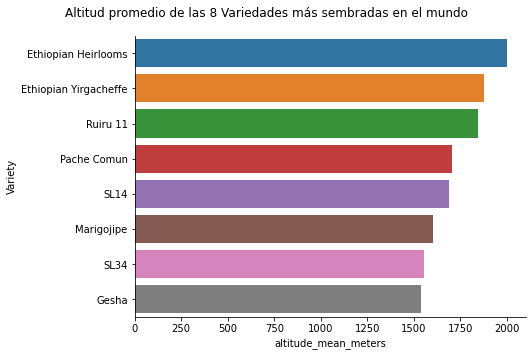

In [51]:
# Las 8 Variedades más sembradas en el mundo
graf_altitud_promedio_variedad_8_mas = sns.catplot(
    data=altitud_x_sabor.head(8), kind="bar",
    x="altitude_mean_meters", y="Variety", aspect=1.5,
)

graf_altitud_promedio_variedad_8_mas.fig.subplots_adjust(top=0.9)
graf_altitud_promedio_variedad_8_mas.fig.suptitle('Altitud promedio de las 8 Variedades más sembradas en el mundo')

Gráfico de Dispersión entre las variables Sabor y Altitud

<AxesSubplot:xlabel='Flavor', ylabel='altitude_mean_meters'>

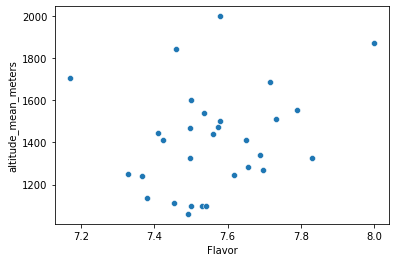

In [52]:
sns.scatterplot(data=altitud_x_sabor,x='Flavor',y='altitude_mean_meters')

Código estadístico de correlación de pearson.

In [53]:
stats.pearsonr(altitud_x_sabor['Flavor'], altitud_x_sabor['altitude_mean_meters'])

(0.23118482119463768, 0.2190037971633194)

Del gráfico anterior podemos decir que el "sabor" con la "altitud" no están tan altamente correlacionadas ya que su correlación es 0.23. Por lo tanto al cambiar la altitud no afectará tanto al sabor.

##### 2. La altitud impacta con la calidad del café?

In [54]:
Variables_Calidad_Cafe = ['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
                          'Clean_Cup', 'Sweetness','Cupper_Points']

In [55]:
df_main[Variables_Calidad_Cafe]

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58
...,...,...,...,...,...,...,...,...,...,...
1334,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58
1336,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17
1337,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92


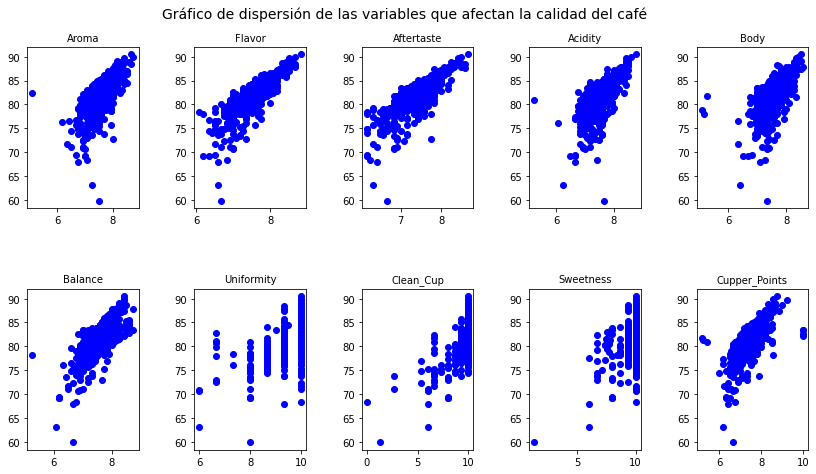

In [56]:
fig, axs = plt.subplots(2,5,figsize=(14,7))
plt.suptitle('Gráfico de dispersión de las variables que afectan la calidad del café', fontsize=14)
var=df_main[Variables_Calidad_Cafe].columns.to_list() 
axs = axs.ravel()

for k,i in zip(var,range(0,len(var))):
    axs[i].scatter(df_main[k],df_main['Total_Cup_Points'],color='blue')
    axs[i].set_title(k,fontsize=10)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)    

Gráfico de Correlación de Variables

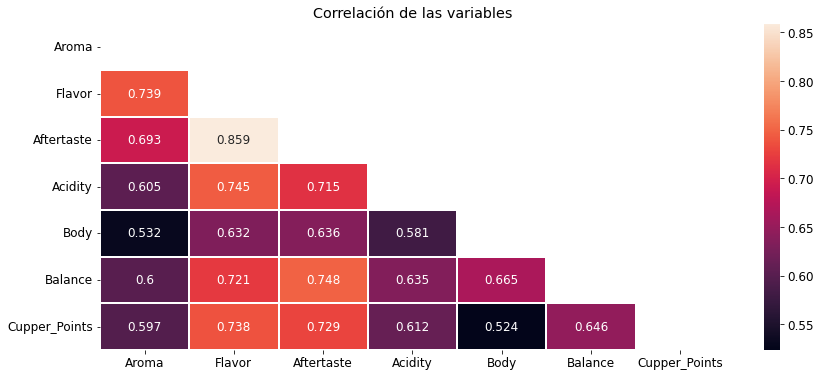

In [57]:
plt.rcParams['figure.figsize']=14,6
plt.rcParams['font.size'] = 12

with sns.axes_style("white"):
    temp=df_main[['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Cupper_Points']].corr()
    
    mask = np.zeros_like(temp)
    mask[np.triu_indices_from(mask)] = True
    
sns.heatmap(temp,mask=mask,annot=True,fmt='.3g', linewidths=.4)
plt.title("Correlación de las variables")
plt.show()

El Flavor, Aftertaste, acidity, body, Balance, Cupper_Points, afectan positivamente a la calidad del café. 

##### 3. Cuales son las 5 mejores variedades de café encontradas dentro de la información, de acuerdo a la puntuación del catador?

1. MENOS DE 80 "COMERCIAL"
2. 80-84 "ESPECIALIDAD"
3. 84-89 " EJEPLAR REGIONAL PLUS+"
4. 90-95 " CAFÉ EJEMPLAR"
5. MAYOR A 95 "CAFÉ ÚNICO"

In [58]:
df_main["Total_Cup_Points"].max()

90.58

La puntuación máxima según nuestros datos es de 90.58

In [59]:
rangos_calidad = [0,80,84,90,91]
calidad_bins = pd.cut(df_main['Total_Cup_Points'],bins=rangos_calidad)
calidad_bins_count = calidad_bins.value_counts()
calidad_bins_count

(80, 84]    904
(84, 90]    239
(0, 80]     193
(90, 91]      1
Name: Total_Cup_Points, dtype: int64

<AxesSubplot:>

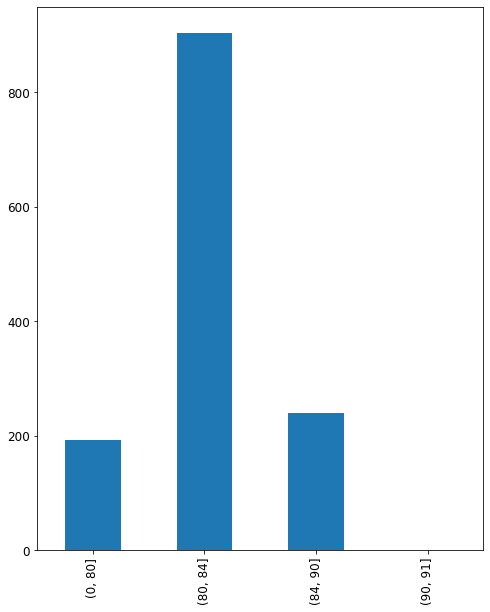

In [60]:
plt.figure(figsize = (8,10))
calidad_bins_count.sort_index().plot(kind='bar')

In [61]:
df_main[['Variety','Total_Cup_Points']][df_main.Total_Cup_Points > 84].sort_values(by='Total_Cup_Points',ascending=False).head(15)

,Variety,Total_Cup_Points
0,Other_2,90.58
1,Other,89.92
2,Bourbon,89.75
3,Other_2,89.00
4,Other,88.83
5,Other_2,88.83
6,Other,88.75
7,Other_2,88.67
8,Other_2,88.42
9,Other,88.25


In [62]:
Variables_Calidad_Cafe

['Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean_Cup',
 'Sweetness',
 'Cupper_Points']

In [63]:
var_calidad = ['Variety','Total_Cup_Points']
Variables_Calidad_Cafe.extend(var_calidad)
Variables_Calidad_Cafe

['Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean_Cup',
 'Sweetness',
 'Cupper_Points',
 'Variety',
 'Total_Cup_Points']

In [64]:
alta_calidad = df_main[Variables_Calidad_Cafe][(df_main.Total_Cup_Points >84) &
                                        (df_main.Variety != 'Other') & 
                                        (df_main.Variety != 'Other_2')].sort_values(by='Total_Cup_Points',ascending=False).head(5)

In [65]:
alta_calidad

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Variety,Total_Cup_Points
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,Bourbon,89.75
19,8.17,8.17,8.00,8.17,8.08,8.33,10.0,10.0,10.0,8.33,Ethiopian Yirgacheffe,87.25
18,8.42,8.25,8.08,8.17,7.92,8.00,10.0,10.0,10.0,8.42,Catimor,87.25
21,8.08,8.25,8.00,8.17,8.00,8.33,10.0,10.0,10.0,8.33,Caturra,87.17
25,8.50,8.50,8.00,8.00,8.00,8.00,10.0,10.0,10.0,7.92,Bourbon,86.92


In [66]:
categories = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
              'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points']

In [67]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[8.42, 8.50, 8.42, 8.42, 8.33, 8.42, 10.0, 10.0, 10.0, 9.25],
      theta=categories,
      name='Bourbon'
))
fig.add_trace(go.Scatterpolar(
      r=[8.42,	8.25,	8.08,	8.17,	7.92,	8.00,	10.0,	10.0,	10.0,	8.42],
      theta=categories,
      name='Catimor'
))
fig.add_trace(go.Scatterpolar(
      r=[8.08,	8.25,	8.00,	8.17,	8.00,	8.33,	10.0,	10.0,	10.0,	8.33],
      theta=categories,
      name='Caturra'
))

fig.update_layout(
  autosize=False,
  width=700,
  height=500,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=True,
)

fig.show()

Se muestra una gráfica parecida usada por los catadores que evalúan la calidad del café